In [211]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import math
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

Required Features

In [212]:
Product_name = []
Memory = []
Battery = []
Processor = []
Camera = []
Price = []
Screen = []
Rating = []

Scraping the Data

In [213]:
for i in range (1,45):
    if i==25 or i==28 or i == 33 or  i==38 or i==39 or i==40 or i == 41:
        continue
    webpage=requests.get(f'https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&p%5B%5D=facets.price_range.from%3D20000&p%5B%5D=facets.price_range.to%3DMax&p%5B%5D=facets.brand%255B%255D%3Drealme&p%5B%5D=facets.brand%255B%255D%3Dacer&p%5B%5D=facets.brand%255B%255D%3DGIONEE&p%5B%5D=facets.brand%255B%255D%3DGoogle&p%5B%5D=facets.brand%255B%255D%3DIQOO&p%5B%5D=facets.brand%255B%255D%3DIntex&p%5B%5D=facets.brand%255B%255D%3DLenovo&p%5B%5D=facets.brand%255B%255D%3DHonor&p%5B%5D=facets.brand%255B%255D%3DPOCO&p%5B%5D=facets.brand%255B%255D%3DBlackBerry&p%5B%5D=facets.brand%255B%255D%3DSAMSUNG&p%5B%5D=facets.brand%255B%255D%3DMi&p%5B%5D=facets.brand%255B%255D%3DMOTOROLA&p%5B%5D=facets.brand%255B%255D%3DOnePlus&p%5B%5D=facets.brand%255B%255D%3DOPPO&p%5B%5D=facets.brand%255B%255D%3DREDMI&p%5B%5D=facets.brand%255B%255D%3Dvivo&p%5B%5D=facets.brand%255B%255D%3DSONY&p%5B%5D=facets.brand%255B%255D%3DNokia&sort=relevance&page={i}').text
    soup = bs(webpage, 'html.parser')
    for data in soup.findAll('div',class_='_3pLy-c row'):
        names=data.find('div', attrs={'class':'_4rR01T'})
        price=data.find('div', attrs={'class':'_30jeq3 _1_WHN1'})
        specification = data.find('div', attrs={'class':'fMghEO'})
        
        for each in specification:
            col=each.find_all('li', attrs={'class':'rgWa7D'})
            memory_ =col[0].text
            screen_ = col[1].text
            camera_ = col[2].text
            battery_ = col[3].text
            processor_ = col[4].text
        Product_name.append(names.text)
        Price.append(price.text)
        Memory.append(memory_)
        Battery.append(battery_)
        Processor.append(processor_)
        Camera.append(camera_)
        Screen.append(screen_)

In [214]:
print(len(Product_name))
print(len(Memory))
print(len(Battery))
print(len(Processor))

816
816
816
816


Storing the Scraped Data in a Pandas DataFrame

In [215]:
df=pd.DataFrame({'Product Name': Product_name,'Memory':Memory,'Battery Capacity':Battery,'Processor':Processor,'Camera':Camera,'Screen Size':Screen,'Price':Price})
df.head()

,Product Name,Memory,Battery Capacity,Processor,Camera,Screen Size,Price
0,"SAMSUNG Galaxy S21 FE 5G (Olive, 128 GB)",8 GB RAM | 128 GB ROM,4500 mAh Lithium-ion Battery,1 Year Manufacturer Warranty for Device and 6 ...,12MP + 12MP + 8MP (OIS) | 32MP Front Camera,16.26 cm (6.4 inch) Full HD+ Display,"₹35,999"
1,"realme GT Neo 3T (Dash Yellow, 128 GB)",6 GB RAM | 128 GB ROM,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 870 Processor,64MP + 8MP + 2MP | 16MP Front Camera,16.81 cm (6.62 inch) Full HD+ AMOLED Display,"₹25,999"
2,"realme GT Neo 3T (Drifting White, 128 GB)",6 GB RAM | 128 GB ROM,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 870 Processor,64MP + 8MP + 2MP | 16MP Front Camera,16.81 cm (6.62 inch) Full HD+ AMOLED Display,"₹25,999"
3,"realme GT Neo 3T (Dash Yellow, 128 GB)",8 GB RAM | 128 GB ROM,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 870 Processor,64MP + 8MP + 2MP | 16MP Front Camera,16.81 cm (6.62 inch) Full HD+ AMOLED Display,"₹27,999"
4,"realme GT Neo 3T (Shade Black, 128 GB)",8 GB RAM | 128 GB ROM,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 870 Processor,64MP + 8MP + 2MP | 16MP Front Camera,16.81 cm (6.62 inch) Full HD+ AMOLED Display,"₹27,999"


In [216]:
df.shape

(816, 7)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product Name      816 non-null    object
 1   Memory            816 non-null    object
 2   Battery Capacity  816 non-null    object
 3   Processor         816 non-null    object
 4   Camera            816 non-null    object
 5   Screen Size       816 non-null    object
 6   Price             816 non-null    object
dtypes: object(7)
memory usage: 44.8+ KB


In [218]:
df.describe()

,Product Name,Memory,Battery Capacity,Processor,Camera,Screen Size,Price
count,816,816,816,816,816,816,816
unique,658,45,115,162,161,91,242
top,"REDMI Note 11S (Polar White, 128 GB)",8 GB RAM | 128 GB ROM,5000 mAh Battery,12 months,50MP Rear Camera,16.94 cm (6.67 inch) Full HD+ Display,"₹20,990"
freq,4,228,119,53,65,53,35


In [219]:
df.isnull().sum()

Product Name        0
Memory              0
Battery Capacity    0
Processor           0
Camera              0
Screen Size         0
Price               0
dtype: int64

In [220]:
df.dtypes

Product Name        object
Memory              object
Battery Capacity    object
Processor           object
Camera              object
Screen Size         object
Price               object
dtype: object

Locating Duplicates

In [221]:
df.loc[df.duplicated()]

,Product Name,Memory,Battery Capacity,Processor,Camera,Screen Size,Price
120,"Google Pixel 7 (Snow, 128 GB)",8 GB RAM | 128 GB ROM,4270 mAh Battery,Google Tensor G2 Processor,50MP + 12MP | 10.8MP Front Camera,16.0 cm (6.3 inch) Full HD+ Display,"₹59,999"
144,"IQOO Z5 5G (Mystic Space, 128 GB)",8 GB RAM | 128 GB ROM,5000 mAh Battery,1 Year Warranty,64MP Rear Camera,16.94 cm (6.67 inch) Display,"₹23,990"
145,"Xiaomi 11Lite NE (Jazz Blue, 128 GB)",8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,4250 mAh Battery,Qualcomm Snapdragon 778G Processor,64MP + 8MP + 5MP | 20MP Front Camera,16.64 cm (6.55 inch) Full HD+ Display,"₹26,490"
240,"SAMSUNG Galaxy A53 (Awesome Black, 128 GB)",8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,5000 mAh Lithium Ion Battery,Exynos Octa Core Processor Processor,64MP + 12MP + 5MP + 5MP | 32MP Front Camera,16.51 cm (6.5 inch) Full HD+ Display,"₹31,999"
337,"IQOO 3 (Quantum Silver, 256 GB)",8 GB RAM | 256 GB ROM,4440 mAh Li-ion Battery,Qualcomm Snapdragon 865 Processor,48MP + 13MP + 13MP + 2MP | 16MP Front Camera,16.36 cm (6.44 inch) Full HD+ Display,"₹40,990"
432,"SAMSUNG Galaxy A53 (Awesome White, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,5000 mAh Lithium Ion Battery,Exynos Octa Core Processor Processor,64MP + 12MP + 5MP + 5MP | 32MP Front Camera,16.51 cm (6.5 inch) Full HD+ Display,"₹30,499"
594,"vivo X60 (Midnight Black, 256 GB)",12 GB RAM | 256 GB ROM,4300 mAh Lithium-ion Battery,Qualcomm Snapdragon 870 Processor,48MP + 13MP + 13MP | 32MP Front Camera,16.66 cm (6.56 inch) Full HD+ Display,"₹46,990"
600,"IQOO 3 (Tornado Black, 256 GB)",8 GB RAM | 256 GB ROM,4440 mAh Li-ion Battery,Qualcomm Snapdragon 865 Processor,48MP + 13MP + 13MP + 2MP | 16MP Front Camera,16.36 cm (6.44 inch) Full HD+ Display,"₹40,990"
744,"realme GT Master Edition (Luna White, 128 GB)",6 GB RAM | 128 GB ROM,4300 mAh Battery,Qualcomm Snapdragon 778G Processor,64MP + 8MP + 2MP | 32MP Front Camera,16.33 cm (6.43 inch) Full HD+ Display,"₹25,999"
756,Honor 8,4 GB RAM | 32 GB ROM | Expandable Upto 128 GB,3000 mAh Li-Polymer Battery,ARM Hisilicon Kirin 950 - ARM Cortex A72 + ARM...,12MP + 12MP | 8MP Front Camera,13.21 cm (5.2 inch) Full HD Display,"₹29,999"


Removing Duplicates

In [222]:
df = df.drop_duplicates()
df.shape

(805, 7)

In [223]:
df.loc[df.duplicated()]

,Product Name,Memory,Battery Capacity,Processor,Camera,Screen Size,Price


Data Cleaning and Preprocessing

In [224]:
df.head()

,Product Name,Memory,Battery Capacity,Processor,Camera,Screen Size,Price
0,"SAMSUNG Galaxy S21 FE 5G (Olive, 128 GB)",8 GB RAM | 128 GB ROM,4500 mAh Lithium-ion Battery,1 Year Manufacturer Warranty for Device and 6 ...,12MP + 12MP + 8MP (OIS) | 32MP Front Camera,16.26 cm (6.4 inch) Full HD+ Display,"₹35,999"
1,"realme GT Neo 3T (Dash Yellow, 128 GB)",6 GB RAM | 128 GB ROM,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 870 Processor,64MP + 8MP + 2MP | 16MP Front Camera,16.81 cm (6.62 inch) Full HD+ AMOLED Display,"₹25,999"
2,"realme GT Neo 3T (Drifting White, 128 GB)",6 GB RAM | 128 GB ROM,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 870 Processor,64MP + 8MP + 2MP | 16MP Front Camera,16.81 cm (6.62 inch) Full HD+ AMOLED Display,"₹25,999"
3,"realme GT Neo 3T (Dash Yellow, 128 GB)",8 GB RAM | 128 GB ROM,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 870 Processor,64MP + 8MP + 2MP | 16MP Front Camera,16.81 cm (6.62 inch) Full HD+ AMOLED Display,"₹27,999"
4,"realme GT Neo 3T (Shade Black, 128 GB)",8 GB RAM | 128 GB ROM,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 870 Processor,64MP + 8MP + 2MP | 16MP Front Camera,16.81 cm (6.62 inch) Full HD+ AMOLED Display,"₹27,999"


In [225]:
df['Brand'] = df['Product Name'].str.split('\s+').str[0]
df.head()

,Product Name,Memory,Battery Capacity,Processor,Camera,Screen Size,Price,Brand
0,"SAMSUNG Galaxy S21 FE 5G (Olive, 128 GB)",8 GB RAM | 128 GB ROM,4500 mAh Lithium-ion Battery,1 Year Manufacturer Warranty for Device and 6 ...,12MP + 12MP + 8MP (OIS) | 32MP Front Camera,16.26 cm (6.4 inch) Full HD+ Display,"₹35,999",SAMSUNG
1,"realme GT Neo 3T (Dash Yellow, 128 GB)",6 GB RAM | 128 GB ROM,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 870 Processor,64MP + 8MP + 2MP | 16MP Front Camera,16.81 cm (6.62 inch) Full HD+ AMOLED Display,"₹25,999",realme
2,"realme GT Neo 3T (Drifting White, 128 GB)",6 GB RAM | 128 GB ROM,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 870 Processor,64MP + 8MP + 2MP | 16MP Front Camera,16.81 cm (6.62 inch) Full HD+ AMOLED Display,"₹25,999",realme
3,"realme GT Neo 3T (Dash Yellow, 128 GB)",8 GB RAM | 128 GB ROM,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 870 Processor,64MP + 8MP + 2MP | 16MP Front Camera,16.81 cm (6.62 inch) Full HD+ AMOLED Display,"₹27,999",realme
4,"realme GT Neo 3T (Shade Black, 128 GB)",8 GB RAM | 128 GB ROM,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 870 Processor,64MP + 8MP + 2MP | 16MP Front Camera,16.81 cm (6.62 inch) Full HD+ AMOLED Display,"₹27,999",realme


In [226]:
df['RAM'] = df['Memory'].str.split('|').str[0]
df['RAM'] = df['RAM'].str.split().str[0]
df['ROM'] = df['Memory'].str.split('|').str[1]
df['ROM'] = df['ROM'].str.split().str[0]
df['Battery Capacity'] = df['Battery Capacity'].str.split('\s+').str[0]
df.tail()

,Product Name,Memory,Battery Capacity,Processor,Camera,Screen Size,Price,Brand,RAM,ROM
811,"OPPO Reno2 Z (Luminous Black, 256 GB)",8 GB RAM | 256 GB ROM | Expandable Upto 256 GB,4000,MediaTek Helio P90 Processor,48MP + 8MP + 2MP + 2MP | 16MP Front Camera,16.51 cm (6.5 inch) Display,"₹32,990",OPPO,8,256
812,"Mi 10i (Midnight Black, 128 GB)",8 GB RAM | 128 GB ROM,4820,Qualcomm® Snapdragon™ 750G Processor,108MP + 8MP + 2MP + 2MP | 16MP Front Camera,16.94 cm (6.67 inch) Full HD+ Display,"₹24,215",Mi,8,128
813,"Mi 10i (Atlantic Blue, 128 GB)",8 GB RAM | 128 GB ROM,4820,Qualcomm® Snapdragon™ 750G Processor,108MP + 8MP + 2MP + 2MP | 16MP Front Camera,16.94 cm (6.67 inch) Full HD+ Display,"₹23,329",Mi,8,128
814,"OnePlus 9 Pro (Pine Green, 128 GB)",8 GB RAM | 128 GB ROM,4500,1 Year,48MP Rear Camera,17.02 cm (6.7 inch) Display,"₹49,990",OnePlus,8,128
815,"SAMSUNG Galaxy A52 (Awesome Violet, 128 GB)",8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,4500,Qualcomm Snapdragon 720G Processor,64MP + 12MP + 5MP + 5MP | 32MP Front Camera,16.51 cm (6.5 inch) Full HD+ Display,"₹26,499",SAMSUNG,8,128


In [227]:
df['Rear Camera'] = df['Camera'].str.split('|').str[0]
df['Rear Camera'] = df['Rear Camera'].str.split().str[0]
df.tail()

,Product Name,Memory,Battery Capacity,Processor,Camera,Screen Size,Price,Brand,RAM,ROM,Rear Camera
811,"OPPO Reno2 Z (Luminous Black, 256 GB)",8 GB RAM | 256 GB ROM | Expandable Upto 256 GB,4000,MediaTek Helio P90 Processor,48MP + 8MP + 2MP + 2MP | 16MP Front Camera,16.51 cm (6.5 inch) Display,"₹32,990",OPPO,8,256,48MP
812,"Mi 10i (Midnight Black, 128 GB)",8 GB RAM | 128 GB ROM,4820,Qualcomm® Snapdragon™ 750G Processor,108MP + 8MP + 2MP + 2MP | 16MP Front Camera,16.94 cm (6.67 inch) Full HD+ Display,"₹24,215",Mi,8,128,108MP
813,"Mi 10i (Atlantic Blue, 128 GB)",8 GB RAM | 128 GB ROM,4820,Qualcomm® Snapdragon™ 750G Processor,108MP + 8MP + 2MP + 2MP | 16MP Front Camera,16.94 cm (6.67 inch) Full HD+ Display,"₹23,329",Mi,8,128,108MP
814,"OnePlus 9 Pro (Pine Green, 128 GB)",8 GB RAM | 128 GB ROM,4500,1 Year,48MP Rear Camera,17.02 cm (6.7 inch) Display,"₹49,990",OnePlus,8,128,48MP
815,"SAMSUNG Galaxy A52 (Awesome Violet, 128 GB)",8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,4500,Qualcomm Snapdragon 720G Processor,64MP + 12MP + 5MP + 5MP | 32MP Front Camera,16.51 cm (6.5 inch) Full HD+ Display,"₹26,499",SAMSUNG,8,128,64MP


In [228]:
def remove_text(string):
    notext = [char for char in string if char.isdigit()]
    notext = ''.join(notext)
    return notext

In [229]:
df['Rear Camera'] = df['Rear Camera'].apply(remove_text)
df.head()

,Product Name,Memory,Battery Capacity,Processor,Camera,Screen Size,Price,Brand,RAM,ROM,Rear Camera
0,"SAMSUNG Galaxy S21 FE 5G (Olive, 128 GB)",8 GB RAM | 128 GB ROM,4500,1 Year Manufacturer Warranty for Device and 6 ...,12MP + 12MP + 8MP (OIS) | 32MP Front Camera,16.26 cm (6.4 inch) Full HD+ Display,"₹35,999",SAMSUNG,8,128,12
1,"realme GT Neo 3T (Dash Yellow, 128 GB)",6 GB RAM | 128 GB ROM,5000,Qualcomm Snapdragon 870 Processor,64MP + 8MP + 2MP | 16MP Front Camera,16.81 cm (6.62 inch) Full HD+ AMOLED Display,"₹25,999",realme,6,128,64
2,"realme GT Neo 3T (Drifting White, 128 GB)",6 GB RAM | 128 GB ROM,5000,Qualcomm Snapdragon 870 Processor,64MP + 8MP + 2MP | 16MP Front Camera,16.81 cm (6.62 inch) Full HD+ AMOLED Display,"₹25,999",realme,6,128,64
3,"realme GT Neo 3T (Dash Yellow, 128 GB)",8 GB RAM | 128 GB ROM,5000,Qualcomm Snapdragon 870 Processor,64MP + 8MP + 2MP | 16MP Front Camera,16.81 cm (6.62 inch) Full HD+ AMOLED Display,"₹27,999",realme,8,128,64
4,"realme GT Neo 3T (Shade Black, 128 GB)",8 GB RAM | 128 GB ROM,5000,Qualcomm Snapdragon 870 Processor,64MP + 8MP + 2MP | 16MP Front Camera,16.81 cm (6.62 inch) Full HD+ AMOLED Display,"₹27,999",realme,8,128,64


In [230]:
df['Screen Size'] = df['Screen Size'].str.split('\s+').str[0]
df.tail()

,Product Name,Memory,Battery Capacity,Processor,Camera,Screen Size,Price,Brand,RAM,ROM,Rear Camera
811,"OPPO Reno2 Z (Luminous Black, 256 GB)",8 GB RAM | 256 GB ROM | Expandable Upto 256 GB,4000,MediaTek Helio P90 Processor,48MP + 8MP + 2MP + 2MP | 16MP Front Camera,16.51,"₹32,990",OPPO,8,256,48
812,"Mi 10i (Midnight Black, 128 GB)",8 GB RAM | 128 GB ROM,4820,Qualcomm® Snapdragon™ 750G Processor,108MP + 8MP + 2MP + 2MP | 16MP Front Camera,16.94,"₹24,215",Mi,8,128,108
813,"Mi 10i (Atlantic Blue, 128 GB)",8 GB RAM | 128 GB ROM,4820,Qualcomm® Snapdragon™ 750G Processor,108MP + 8MP + 2MP + 2MP | 16MP Front Camera,16.94,"₹23,329",Mi,8,128,108
814,"OnePlus 9 Pro (Pine Green, 128 GB)",8 GB RAM | 128 GB ROM,4500,1 Year,48MP Rear Camera,17.02,"₹49,990",OnePlus,8,128,48
815,"SAMSUNG Galaxy A52 (Awesome Violet, 128 GB)",8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,4500,Qualcomm Snapdragon 720G Processor,64MP + 12MP + 5MP + 5MP | 32MP Front Camera,16.51,"₹26,499",SAMSUNG,8,128,64


In [231]:
df.Price = df.Price.apply(remove_text)
df.head()

,Product Name,Memory,Battery Capacity,Processor,Camera,Screen Size,Price,Brand,RAM,ROM,Rear Camera
0,"SAMSUNG Galaxy S21 FE 5G (Olive, 128 GB)",8 GB RAM | 128 GB ROM,4500,1 Year Manufacturer Warranty for Device and 6 ...,12MP + 12MP + 8MP (OIS) | 32MP Front Camera,16.26,35999,SAMSUNG,8,128,12
1,"realme GT Neo 3T (Dash Yellow, 128 GB)",6 GB RAM | 128 GB ROM,5000,Qualcomm Snapdragon 870 Processor,64MP + 8MP + 2MP | 16MP Front Camera,16.81,25999,realme,6,128,64
2,"realme GT Neo 3T (Drifting White, 128 GB)",6 GB RAM | 128 GB ROM,5000,Qualcomm Snapdragon 870 Processor,64MP + 8MP + 2MP | 16MP Front Camera,16.81,25999,realme,6,128,64
3,"realme GT Neo 3T (Dash Yellow, 128 GB)",8 GB RAM | 128 GB ROM,5000,Qualcomm Snapdragon 870 Processor,64MP + 8MP + 2MP | 16MP Front Camera,16.81,27999,realme,8,128,64
4,"realme GT Neo 3T (Shade Black, 128 GB)",8 GB RAM | 128 GB ROM,5000,Qualcomm Snapdragon 870 Processor,64MP + 8MP + 2MP | 16MP Front Camera,16.81,27999,realme,8,128,64


In [232]:
df['Processor'].value_counts()

12 months                                                                                    53
1 Year Manufacturer Warranty for Handset and 6 Months Warranty for In the Box Accessories    44
1 Year                                                                                       39
Qualcomm Snapdragon 870 Processor                                                            31
Qualcomm Snapdragon 778G Processor                                                           30
                                                                                             ..
Mediatek MT6750T Octa Core 1.5 GHz Processor                                                  1
1 Year Manufacturer Warranty                                                                  1
12 month                                                                                      1
ONE YEAR COMPANY WARRANTY                                                                     1
Qualcomm Snapdragron 675 Processor      

In [233]:
df = df.drop('Processor',1)
df.head()

,Product Name,Memory,Battery Capacity,Camera,Screen Size,Price,Brand,RAM,ROM,Rear Camera
0,"SAMSUNG Galaxy S21 FE 5G (Olive, 128 GB)",8 GB RAM | 128 GB ROM,4500,12MP + 12MP + 8MP (OIS) | 32MP Front Camera,16.26,35999,SAMSUNG,8,128,12
1,"realme GT Neo 3T (Dash Yellow, 128 GB)",6 GB RAM | 128 GB ROM,5000,64MP + 8MP + 2MP | 16MP Front Camera,16.81,25999,realme,6,128,64
2,"realme GT Neo 3T (Drifting White, 128 GB)",6 GB RAM | 128 GB ROM,5000,64MP + 8MP + 2MP | 16MP Front Camera,16.81,25999,realme,6,128,64
3,"realme GT Neo 3T (Dash Yellow, 128 GB)",8 GB RAM | 128 GB ROM,5000,64MP + 8MP + 2MP | 16MP Front Camera,16.81,27999,realme,8,128,64
4,"realme GT Neo 3T (Shade Black, 128 GB)",8 GB RAM | 128 GB ROM,5000,64MP + 8MP + 2MP | 16MP Front Camera,16.81,27999,realme,8,128,64


EXPLORATORY DATA ANALYSIS

In [234]:
df.Brand.value_counts()

SAMSUNG     176
OPPO         95
realme       84
vivo         80
OnePlus      64
IQOO         51
REDMI        46
Xiaomi       38
Mi           33
Redmi        31
Google       21
MOTOROLA     20
POCO         18
Honor        10
SONY         10
11            8
Nokia         8
GIONEE        4
Moto          4
Lenovo        3
MI            1
Name: Brand, dtype: int64

In [235]:
df.RAM.value_counts()

8     436
6     195
12    110
4      47
3      12
1       2
2       2
16      1
Name: RAM, dtype: int64

In [236]:
df.ROM.value_counts()

128    532
256    188
64      63
32       9
16       7
512      6
Name: ROM, dtype: int64

In [237]:
df['Screen Size'].value_counts()

16.94    116
17.02    101
16.33     66
16.51     65
16.76     59
16.36     54
16.26     52
16.64     41
16.81     40
16.66     27
16.71     21
16.0      18
16.23     16
15.24     16
12.7      12
13.97      9
17.22      9
15.49      8
13.21      7
17.27      7
19.3       7
17.09      6
16.69      5
15.82      4
15.21      4
16.74      3
16.28      3
16.59      3
17.53      2
14.83      2
15.9       2
15.6       2
16.21      2
15.75      2
14.22      2
14.73      2
15.7       2
17.0       1
16.48      1
16.54      1
16.56      1
13.46      1
13.08      1
14.48      1
14.76      1
Name: Screen Size, dtype: int64

In [238]:
df['Battery Capacity'].value_counts()

5000    235
4500    168
4000     62
4250     21
4400     20
4700     19
4300     19
4200     19
3700     17
6000     12
4520     12
3500     11
5020     11
5160     10
4310      8
3400      8
4800      8
3300      8
3000      8
4820      8
3200      7
4020      7
4600      6
5080      6
2700      6
4025      6
4350      6
3750      5
4440      5
7000      5
4830      4
5065      4
4050      4
4450      4
3600      3
4015      3
4926      3
4270      3
2900      2
3230      2
2620      2
2410      2
3520      2
3800      2
4010      2
3010      2
4100      2
3730      2
4610      2
4410      2
2510      1
3090      1
3320      1
3260      1
2500      1
3100      1
3140      1
3450      1
2930      1
2770      1
Name: Battery Capacity, dtype: int64

In [239]:
df['Rear Camera'].value_counts()

64     239
50     168
48     165
108    111
12      39
16      32
122     13
13       8
24       5
32       4
207      4
20       3
8        3
19       3
23       3
200      2
123      2
5        1
Name: Rear Camera, dtype: int64

In [240]:
df.head()

,Product Name,Memory,Battery Capacity,Camera,Screen Size,Price,Brand,RAM,ROM,Rear Camera
0,"SAMSUNG Galaxy S21 FE 5G (Olive, 128 GB)",8 GB RAM | 128 GB ROM,4500,12MP + 12MP + 8MP (OIS) | 32MP Front Camera,16.26,35999,SAMSUNG,8,128,12
1,"realme GT Neo 3T (Dash Yellow, 128 GB)",6 GB RAM | 128 GB ROM,5000,64MP + 8MP + 2MP | 16MP Front Camera,16.81,25999,realme,6,128,64
2,"realme GT Neo 3T (Drifting White, 128 GB)",6 GB RAM | 128 GB ROM,5000,64MP + 8MP + 2MP | 16MP Front Camera,16.81,25999,realme,6,128,64
3,"realme GT Neo 3T (Dash Yellow, 128 GB)",8 GB RAM | 128 GB ROM,5000,64MP + 8MP + 2MP | 16MP Front Camera,16.81,27999,realme,8,128,64
4,"realme GT Neo 3T (Shade Black, 128 GB)",8 GB RAM | 128 GB ROM,5000,64MP + 8MP + 2MP | 16MP Front Camera,16.81,27999,realme,8,128,64


In [241]:
df['Battery Capacity'] = df['Battery Capacity'].astype('int')
df['Screen Size'] = df['Screen Size'].astype('float')
df['Price'] = df['Price'].astype('int')
df['RAM'] = df['RAM'].astype('int')
df['ROM'] = df['ROM'].astype('int')
df['Rear Camera'] = df['Rear Camera'].astype('int')
df.dtypes

Product Name         object
Memory               object
Battery Capacity      int32
Camera               object
Screen Size         float64
Price                 int32
Brand                object
RAM                   int32
ROM                   int32
Rear Camera           int32
dtype: object

EDA

Pair Plot

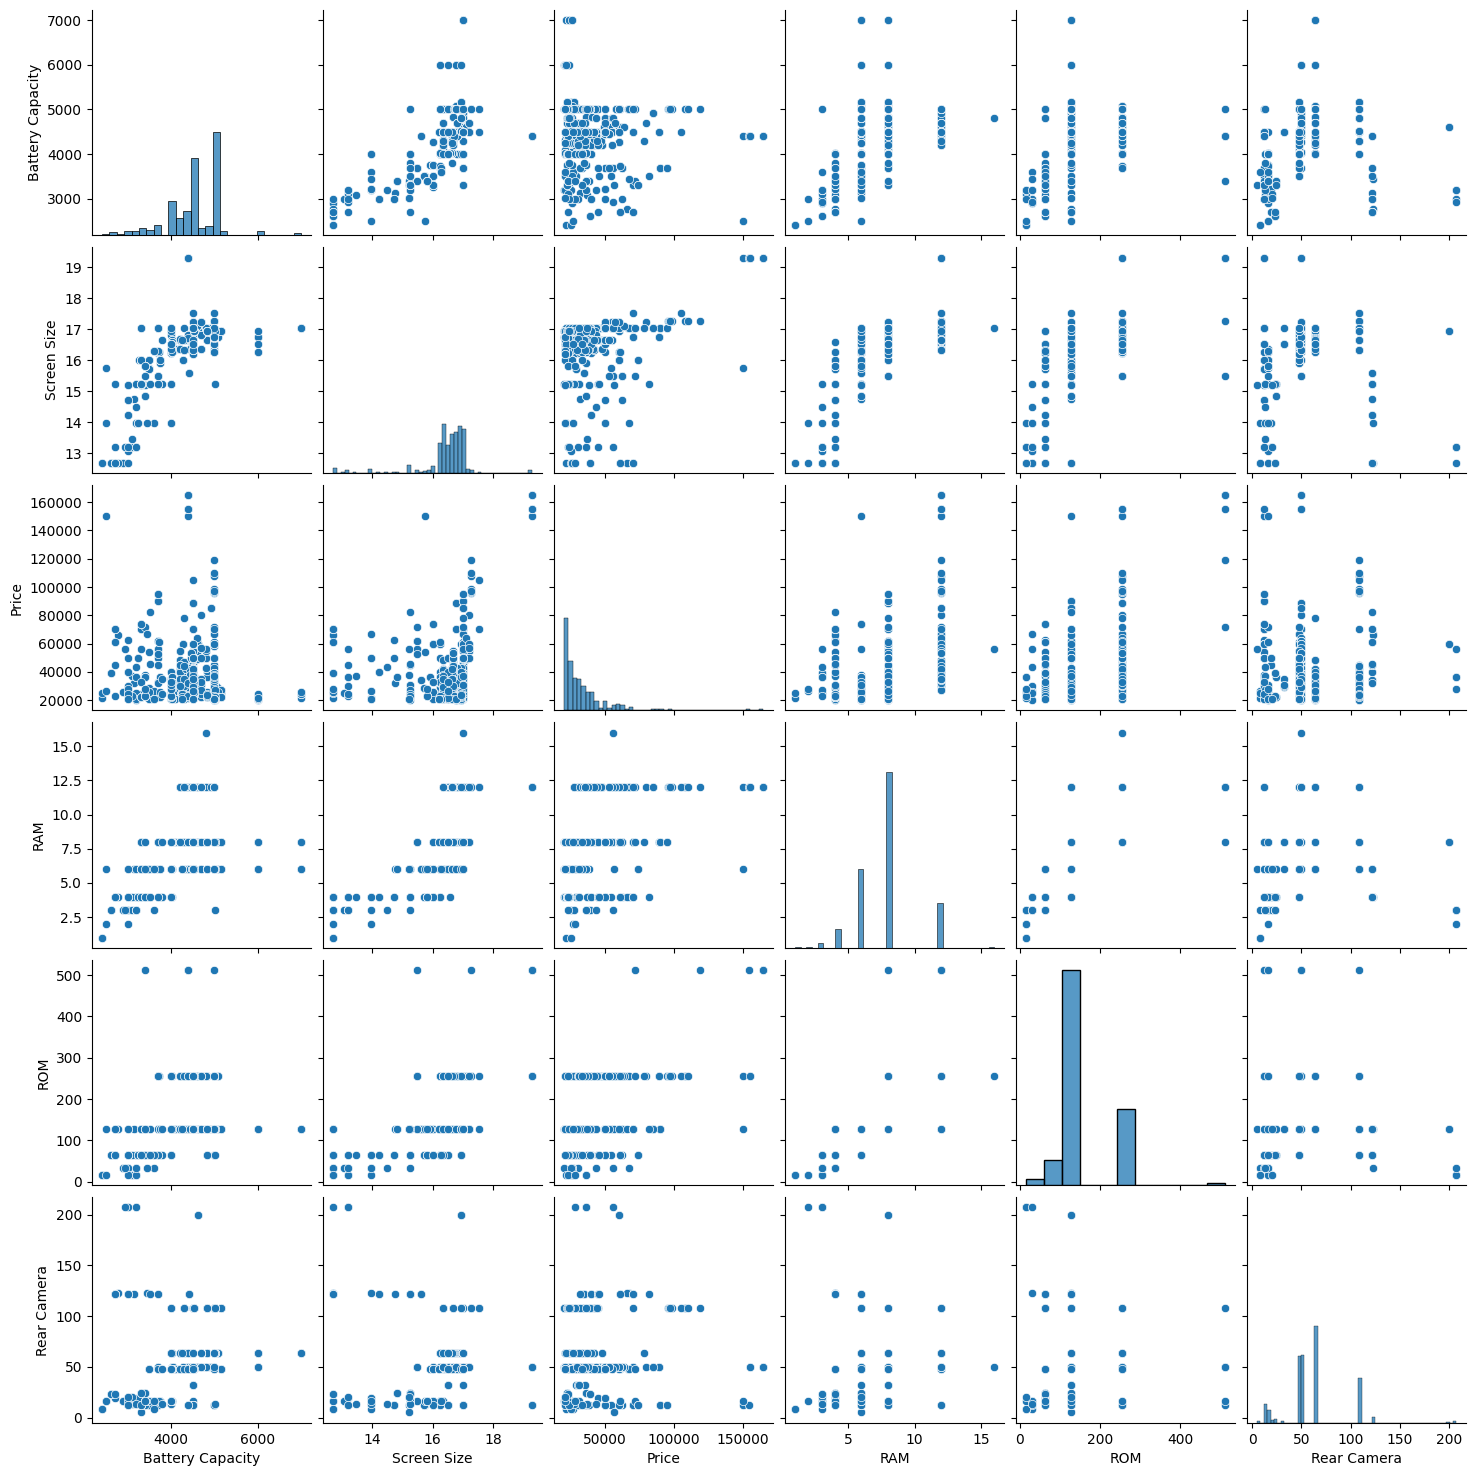

In [242]:
sns.pairplot(df)

Distribution Plot

<AxesSubplot: title={'center': 'Mobile Price Distribution Plot'}, xlabel='Price', ylabel='Density'>

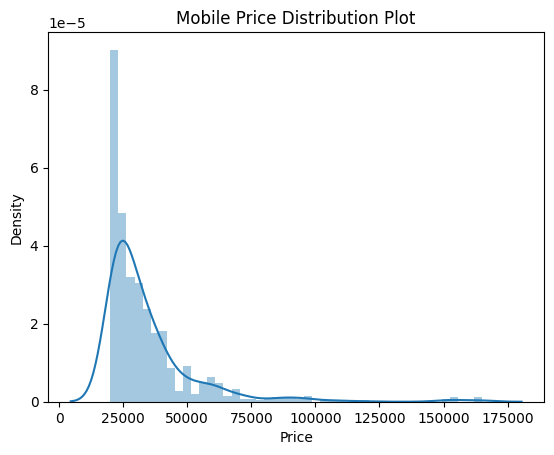

In [243]:
plt.title('Mobile Price Distribution Plot')
sns.distplot(df.Price)

BRAND VS PRICE

<AxesSubplot: xlabel='Brand', ylabel='Price'>

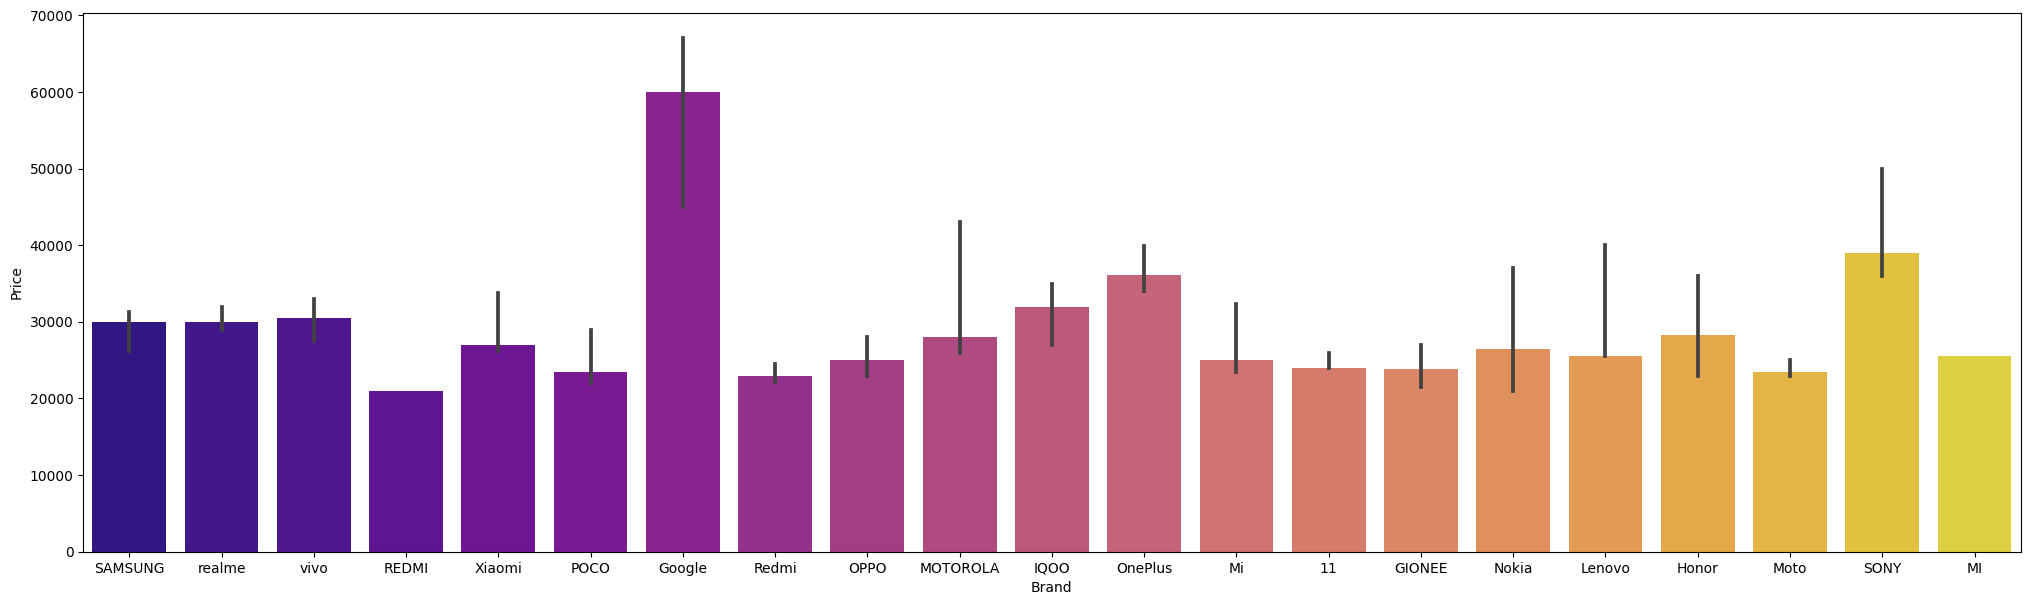

In [244]:
plt.figure(figsize=(25, 7))
sns.barplot(x ='Brand', y ='Price', data = df,
            palette ='plasma', estimator = np.median)

Brand Counts

<AxesSubplot: xlabel='Brand', ylabel='count'>

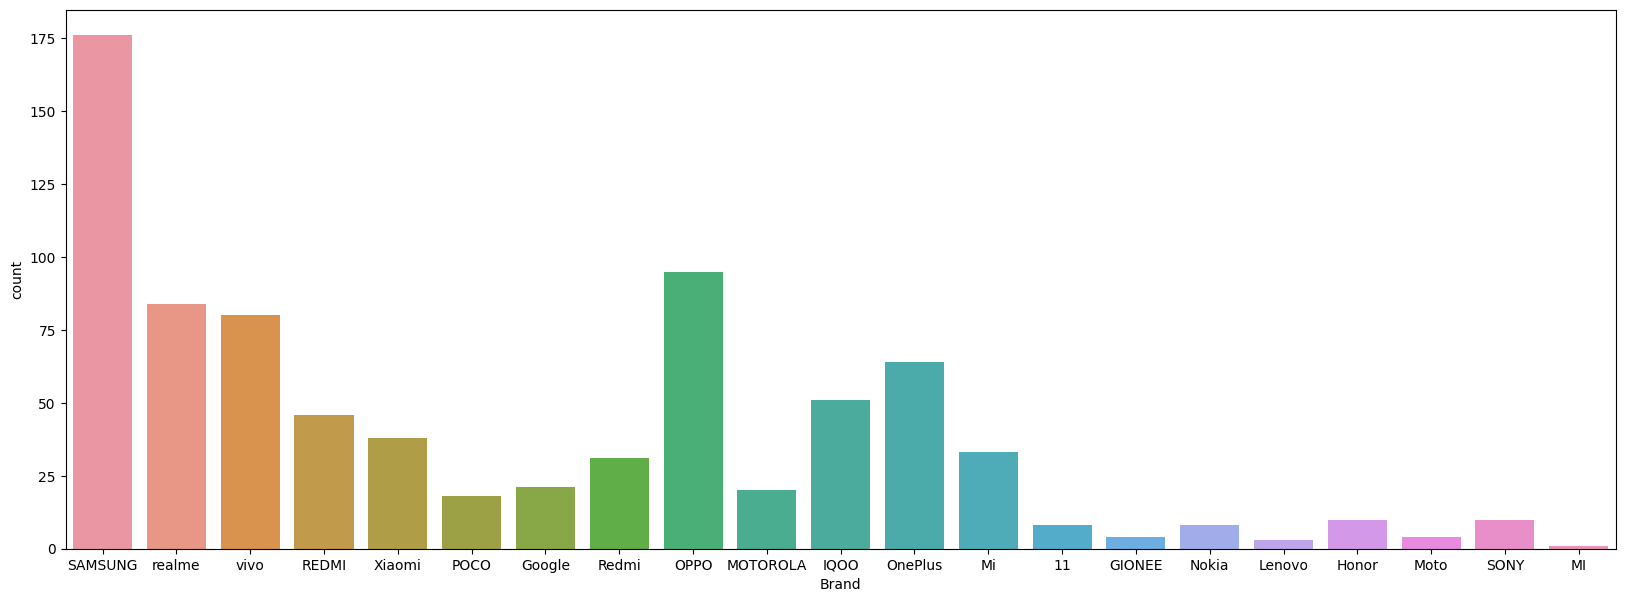

In [245]:
plt.figure(figsize=(20, 7))
sns.countplot(data = df, x = 'Brand')

Correlation Heatmap

In [246]:
df.corr()

,Battery Capacity,Screen Size,Price,RAM,ROM,Rear Camera
Battery Capacity,1.000000,0.660613,-0.170371,0.328099,0.196525,0.255084
Screen Size,0.660613,1.000000,0.191879,0.571226,0.456924,0.102796
Price,-0.170371,0.191879,1.000000,0.380748,0.476865,-0.055010
RAM,0.328099,0.571226,0.380748,1.000000,0.723905,0.031175
ROM,0.196525,0.456924,0.476865,0.723905,1.000000,0.020713
Rear Camera,0.255084,0.102796,-0.055010,0.031175,0.020713,1.000000


<AxesSubplot: >

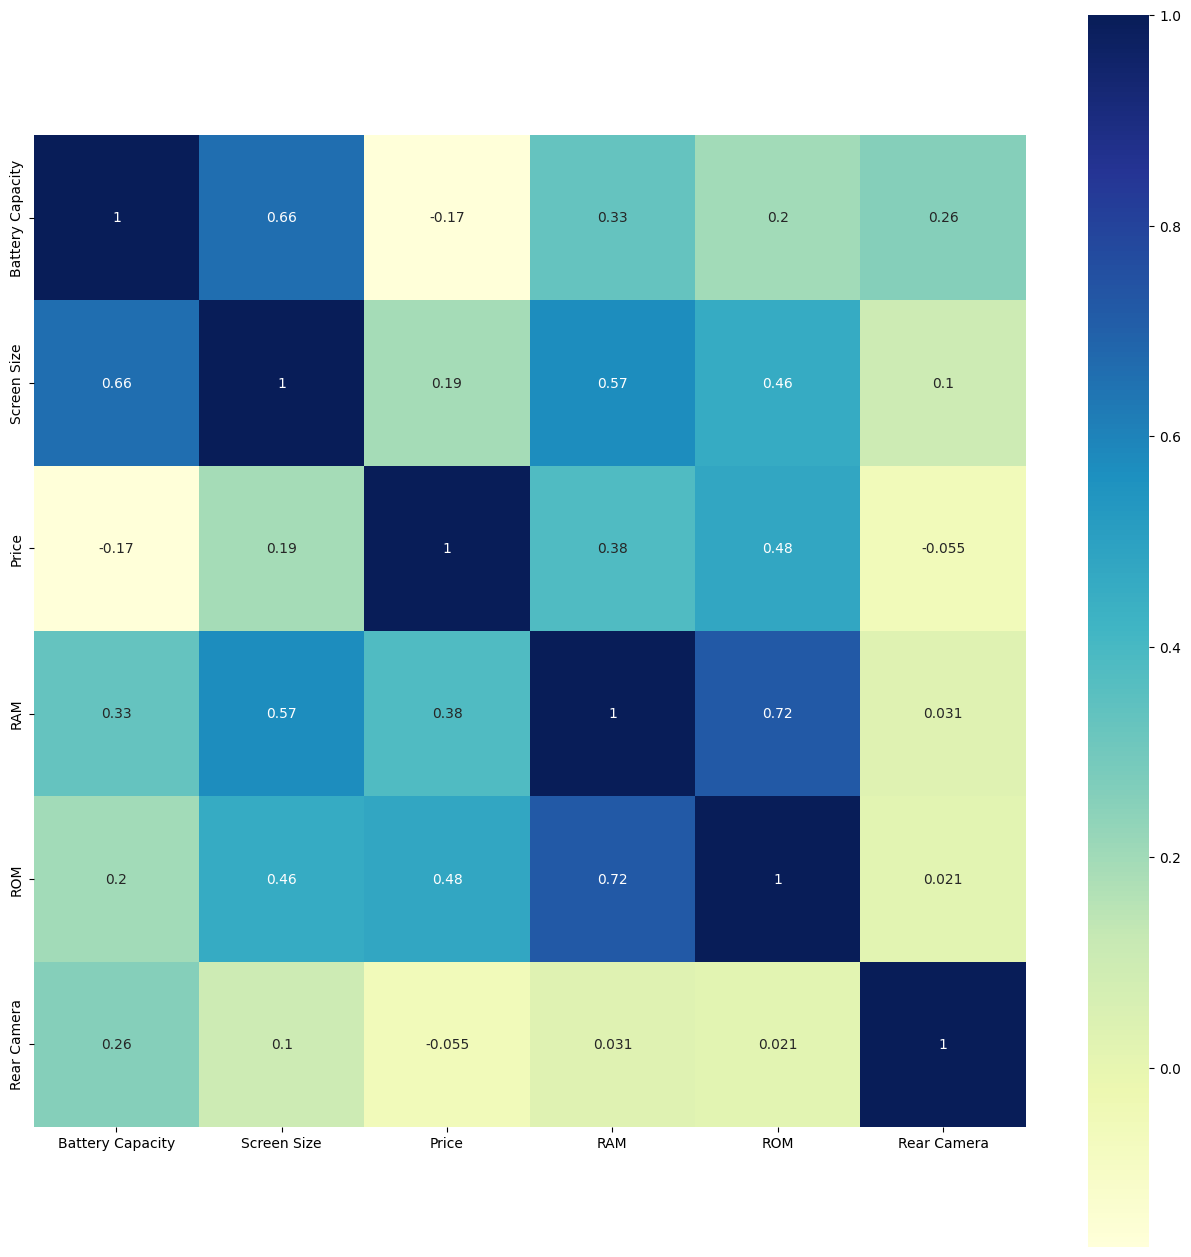

In [247]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, square = True)

Correlation With Price

In [248]:
corr_sorted = df.corr().unstack().sort_values(kind='quicksort', ascending = False)
print(corr_sorted['Price'].head(20))

Price               1.000000
ROM                 0.476865
RAM                 0.380748
Screen Size         0.191879
Rear Camera        -0.055010
Battery Capacity   -0.170371
dtype: float64


In [249]:
df.groupby(['Brand']).mean()

,Battery Capacity,Screen Size,Price,RAM,ROM,Rear Camera
Brand,,,,,,
11,4250.000000,16.640000,24533.000000,7.000000,128.000000,64.000000
GIONEE,3885.000000,14.287500,24061.500000,3.250000,52.000000,13.750000
Google,3667.047619,14.851905,58470.761905,6.000000,102.095238,101.523810
Honor,3525.000000,14.985000,29349.000000,4.800000,78.400000,23.200000
IQOO,4598.039216,16.733922,32379.490196,8.980392,178.196078,54.901961
Lenovo,3266.666667,13.876667,30332.333333,4.666667,64.000000,26.666667
MI,4520.000000,16.940000,25495.000000,6.000000,128.000000,48.000000
MOTOROLA,4360.500000,16.803500,38849.000000,7.700000,128.000000,83.600000
Mi,4475.757576,16.629394,28441.606061,6.878788,128.969697,75.393939


In [250]:
df.groupby(['Brand']).sum()

,Battery Capacity,Screen Size,Price,RAM,ROM,Rear Camera
Brand,,,,,,
11,34000,133.12,196264,56,1024,512
GIONEE,15540,57.15,96246,13,208,55
Google,77008,311.89,1227886,126,2144,2132
Honor,35250,149.85,293490,48,784,232
IQOO,234500,853.43,1651354,458,9088,2800
Lenovo,9800,41.63,90997,14,192,80
MI,4520,16.94,25495,6,128,48
MOTOROLA,87210,336.07,776980,154,2560,1672
Mi,147700,548.77,938573,227,4256,2488


<AxesSubplot: >

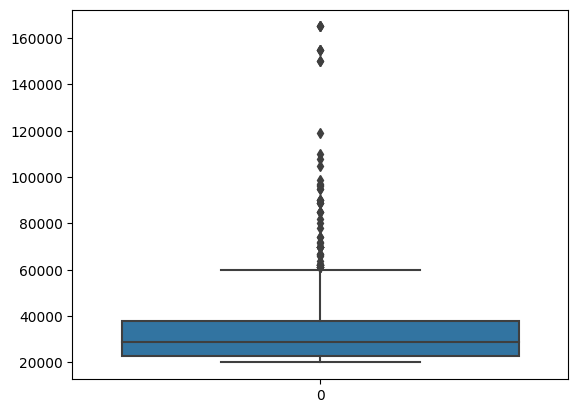

In [251]:

sns.boxplot(df.Price)

<AxesSubplot: >

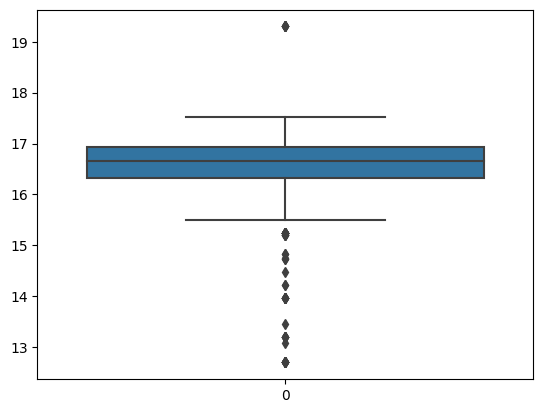

In [252]:
sns.boxplot(df['Screen Size'])

Label Encoding

In [253]:
le = LabelEncoder()
df['Brand'] = le.fit_transform(df['Brand'])
df.head()

,Product Name,Memory,Battery Capacity,Camera,Screen Size,Price,Brand,RAM,ROM,Rear Camera
0,"SAMSUNG Galaxy S21 FE 5G (Olive, 128 GB)",8 GB RAM | 128 GB ROM,4500,12MP + 12MP + 8MP (OIS) | 32MP Front Camera,16.26,35999,16,8,128,12
1,"realme GT Neo 3T (Dash Yellow, 128 GB)",6 GB RAM | 128 GB ROM,5000,64MP + 8MP + 2MP | 16MP Front Camera,16.81,25999,19,6,128,64
2,"realme GT Neo 3T (Drifting White, 128 GB)",6 GB RAM | 128 GB ROM,5000,64MP + 8MP + 2MP | 16MP Front Camera,16.81,25999,19,6,128,64
3,"realme GT Neo 3T (Dash Yellow, 128 GB)",8 GB RAM | 128 GB ROM,5000,64MP + 8MP + 2MP | 16MP Front Camera,16.81,27999,19,8,128,64
4,"realme GT Neo 3T (Shade Black, 128 GB)",8 GB RAM | 128 GB ROM,5000,64MP + 8MP + 2MP | 16MP Front Camera,16.81,27999,19,8,128,64


In [254]:
X = df[['Battery Capacity','Screen Size','Brand','RAM','ROM','Rear Camera']].values
y = df['Price'].values

Feature Ranking

Feature ranking
Battery Capacity    0.619953
Memory              0.579511
Price               0.388184
Product Name        0.377792
Camera              0.355711
Screen Size         0.268831
dtype: float64


<AxesSubplot: >

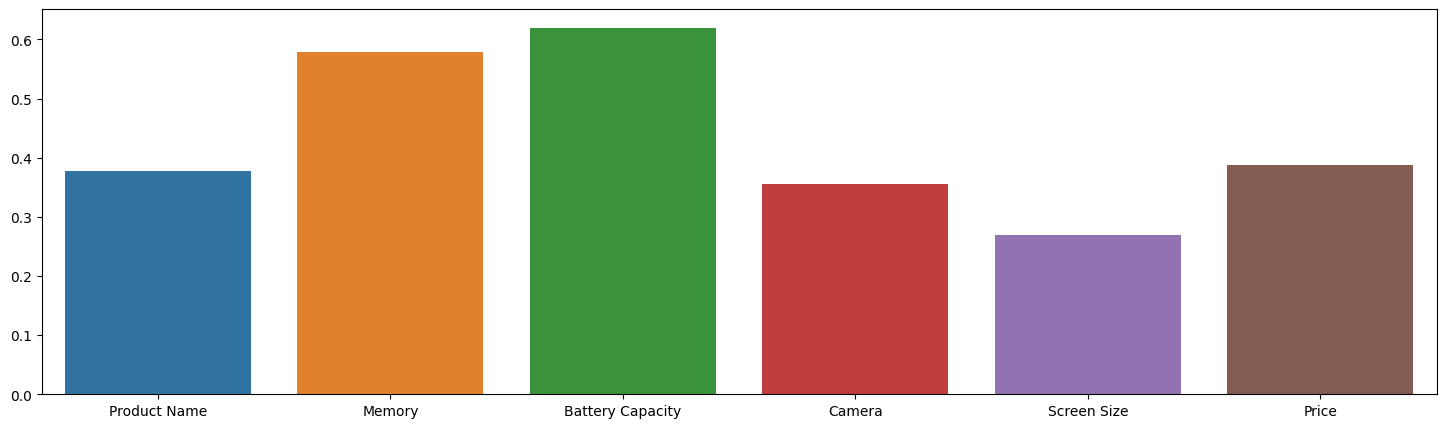

In [255]:
importances = mutual_info_regression(X,y)
feat_importances = pd.Series(importances, df.columns[0:(df.shape[1]-4)])
print('Feature ranking')
print(feat_importances.sort_values(ascending = False))
plt.figure(figsize=(18,5))
sns.barplot( x= df.columns[0:(df.shape[1]-4)], y = importances  )

Data Scaling

In [256]:
X = MaxAbsScaler().fit_transform(X)

Train Test Split

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=3)
print("X_train Shape : ",X_train.shape)
print("y_train Shape : ",y_train.shape)
print("X_test Shape : ",X_test.shape)
print("y_test Shape : ",y_test.shape)

X_train Shape :  (644, 6)
y_train Shape :  (644,)
X_test Shape :  (161, 6)
y_test Shape :  (161,)


XGBoost

XG Boost Regression
MSE:  10394708.51482024
RMSE:  3224.082584987587
R2 Score:  0.9553057651196998



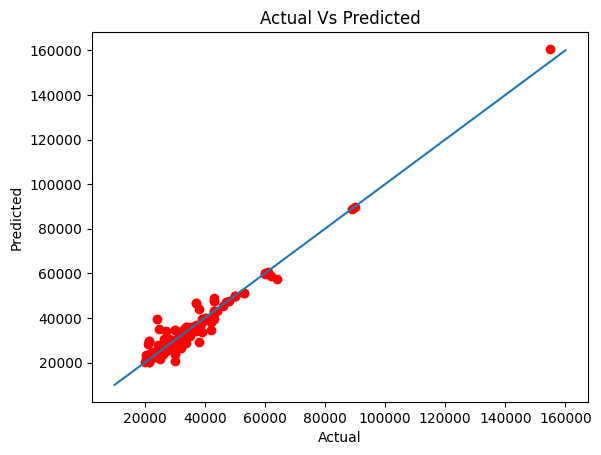

In [268]:
xg = XGBRegressor().fit(X_train,y_train)
yhat5 = xg.predict(X_test)
MSE5 = metrics.mean_squared_error(y_test,yhat5)
RMSE5 = math.sqrt(MSE5)
MAE5 = metrics.mean_absolute_error(y_test,yhat5)
r25 = metrics.r2_score(y_test,yhat5)
print("XG Boost Regression")
print("MSE: ",MSE5)
print("RMSE: ",RMSE5)
print("R2 Score: ",r25)
print("")
plt.scatter(y_test, yhat5, color = 'red')
plt.title('Actual Vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([10000, 160000], [10000, 160000])
plt.show()

Random Forest

Random Forest Regression
MSE:  15504890.963521957
RMSE:  3937.6250410014864
R2 Score:  0.9333334612000826



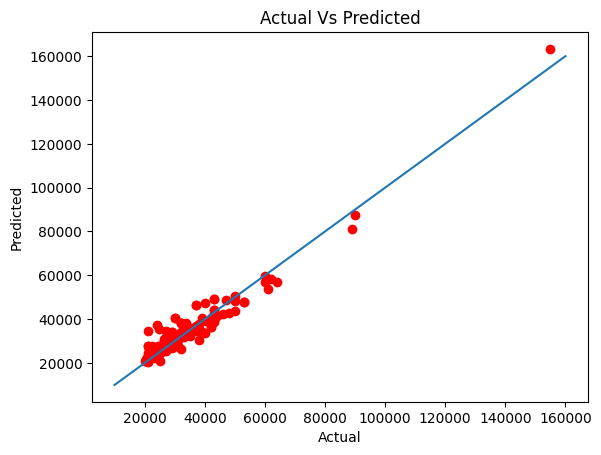

In [269]:
rfr = RandomForestRegressor(n_estimators = 100 , random_state = 3).fit(X_train,y_train)
yhat3 = rfr.predict(X_test)
MSE3 = metrics.mean_squared_error(y_test,yhat3)
RMSE3 = math.sqrt(MSE3)
MAE3 = metrics.mean_absolute_error(y_test,yhat3)
r23 = metrics.r2_score(y_test,yhat3)
print("Random Forest Regression")
print("MSE: ",MSE3)
print("RMSE: ",RMSE3)
print("R2 Score: ",r23)
print('')
plt.scatter(y_test, yhat3, color = 'red')
plt.title('Actual Vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([10000, 160000], [10000, 160000])
plt.show()

LGBM

LGBM
MSE:  34081953.25946405
RMSE:  5837.975099250086
R2 Score:  0.853457475792986



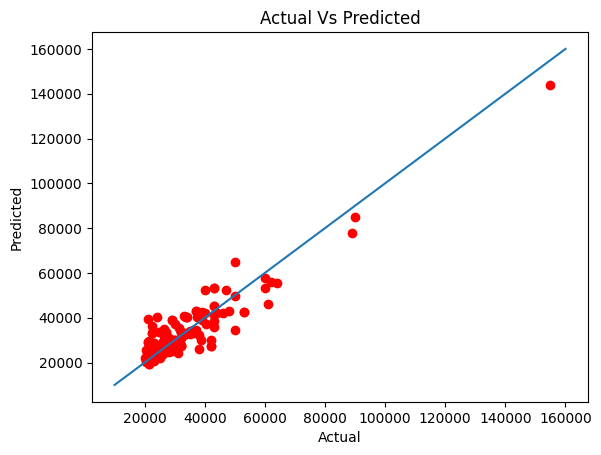

In [270]:
lgbm = LGBMRegressor().fit(X_train,y_train)
yhat6 = lgbm.predict(X_test)
MSE6 = metrics.mean_squared_error(y_test,yhat6)
RMSE6 = math.sqrt(MSE6)
MAE6 = metrics.mean_absolute_error(y_test,yhat6)
r26 = metrics.r2_score(y_test,yhat6)
print("LGBM")
print("MSE: ",MSE6)
print("RMSE: ",RMSE6)
print("R2 Score: ",r26)
print("")
plt.scatter(y_test, yhat6, color = 'red')
plt.title('Actual Vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([10000, 160000], [10000, 160000])
plt.show()

CATBoost

Learning rate set to 0.038193
0:	learn: 20139.7409659	total: 778us	remaining: 778ms
1:	learn: 19821.9991028	total: 1.5ms	remaining: 748ms
2:	learn: 19472.0565188	total: 2.28ms	remaining: 757ms
3:	learn: 19116.7387659	total: 2.94ms	remaining: 732ms
4:	learn: 18838.8240300	total: 3.58ms	remaining: 713ms
5:	learn: 18497.0971758	total: 4.25ms	remaining: 705ms
6:	learn: 18207.4777440	total: 4.93ms	remaining: 699ms
7:	learn: 17854.3459348	total: 5.61ms	remaining: 696ms
8:	learn: 17571.3895500	total: 6.3ms	remaining: 694ms
9:	learn: 17345.5588116	total: 6.63ms	remaining: 657ms
10:	learn: 17060.6306111	total: 7.25ms	remaining: 652ms
11:	learn: 16813.8058903	total: 7.95ms	remaining: 654ms
12:	learn: 16585.6833616	total: 8.59ms	remaining: 652ms
13:	learn: 16345.4783830	total: 9.27ms	remaining: 653ms
14:	learn: 16176.8377147	total: 9.67ms	remaining: 635ms
15:	learn: 15918.9948848	total: 10.3ms	remaining: 635ms
16:	learn: 15685.7412909	total: 11ms	remaining: 633ms
17:	learn: 15502.1257793	total: 1

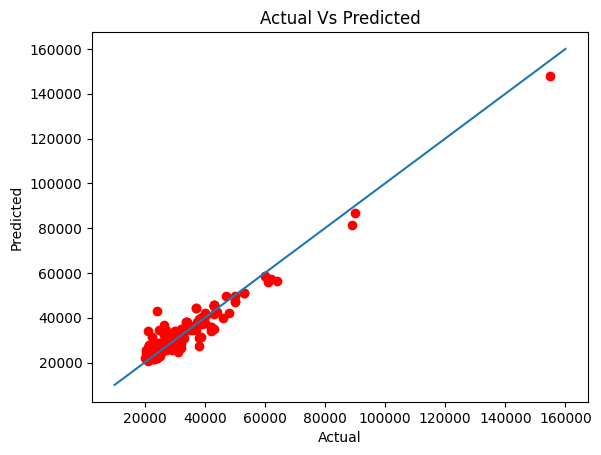

In [271]:
cb = CatBoostRegressor().fit(X_train,y_train)
yhat7 = cb.predict(X_test)
MSE7 = metrics.mean_squared_error(y_test,yhat7)
RMSE7 = math.sqrt(MSE7)
MAE7 = metrics.mean_absolute_error(y_test,yhat7)
r27 = metrics.r2_score(y_test,yhat7)
print("CATBoost")
print("MSE: ",MSE7)
print("RMSE: ",RMSE7)
print("R2 Score: ",r27)
print("")
plt.scatter(y_test, yhat7, color = 'red')
plt.title('Actual Vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([10000, 160000], [10000, 160000])
plt.show()